# Ice Cream Sales

Forecasting profits from ice cream sales based on ambient temperature

- Database:
  - Input(X): Temperature
  - Output (Y): Daily profit in dollars

## 1. Libraries Import

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.16.1'

## 2. Database Import

In [3]:
sales_df = pd.read_csv('C:/Users/SAMSUNG/OneDrive/Documentos/PROJETOS/deep_learning_with_tensorflow/data/SalesData.csv')

In [4]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


## 3. Database Visualization

<Axes: xlabel='Temperature', ylabel='Revenue'>

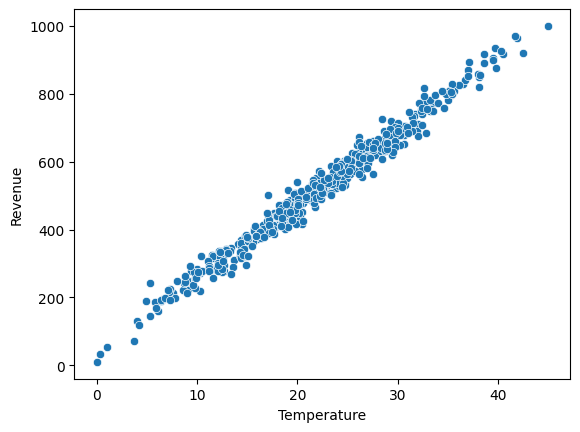

In [8]:
sns.scatterplot(data=sales_df, x='Temperature', y='Revenue')

## 4. Creation of database variables

In [9]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [10]:
X_train.shape

(500,)

In [11]:
y_train.shape

(500,)

## 5. Creation and construction of the model

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=20, input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [27]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 201696.2500  
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22786.9336 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2728.5818 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1332.6418
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1139.6532 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 741.3088
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 657.6647 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 695.4211 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 673.2248
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 666.7221 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 663.6235 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 668.0591 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 658.2721 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 664.2379 
Epoch

## 6. Model Evaluation

In [28]:
epochs_hist.history.keys()

dict_keys(['loss'])

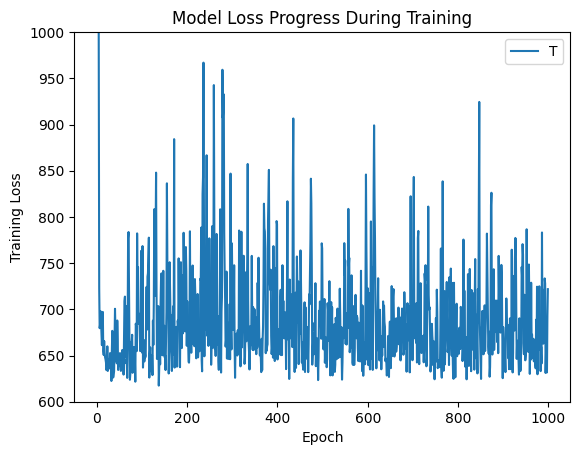

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss Progress During Training")
plt.xlabel('Epoch')
plt.ylabel("Training Loss")
plt.legend('Training Loss')
plt.ylim(600, 1000)
plt.show()

In [32]:
model.get_weights()

[array([[ 5.1582716e-03,  1.9788537e-03,  5.7754363e-03,  3.4190021e+00,
          8.0263662e-01,  3.3283103e-03, -1.4643751e-03, -7.7718031e-03,
          2.0865198e-02, -3.2149535e-03, -8.6036623e-03,  1.2587623e-02,
         -3.5305372e-03,  5.8073243e-03, -1.3737869e-02, -1.9679394e+00,
          1.7252553e-04,  4.5800698e-06, -1.6382886e-02,  2.2466593e+00]],
       dtype=float32),
 array([-2.48390183e-01, -3.90391499e-02, -1.34415478e-01,  4.77711487e+00,
         2.29449439e+00, -7.79137984e-02,  1.05026625e-01,  2.67356068e-01,
        -4.17049438e-01,  2.76075006e-01,  4.39114064e-01, -2.25024104e-01,
         1.80802822e-01,  5.10935336e-02,  3.00975323e-01, -3.40625858e+00,
        -4.60438197e-03,  2.58081444e-02,  3.46522957e-01,  3.62434602e+00],
       dtype=float32),
 array([[-7.7309068e-03],
        [-1.3113435e-04],
        [ 4.1964836e-04],
        [ 3.4827361e+00],
        [ 8.6207932e-01],
        [-1.8784170e-03],
        [ 2.7506771e-03],
        [-3.2275785e-03]

In [35]:
# Predictions with trained model
temp = np.array([5])
revenue = model.predict(temp)
print(f'Revenue Predictions Using Trained ANN = {revenue}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Revenue Predictions Using Trained ANN = [[153.5557]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step


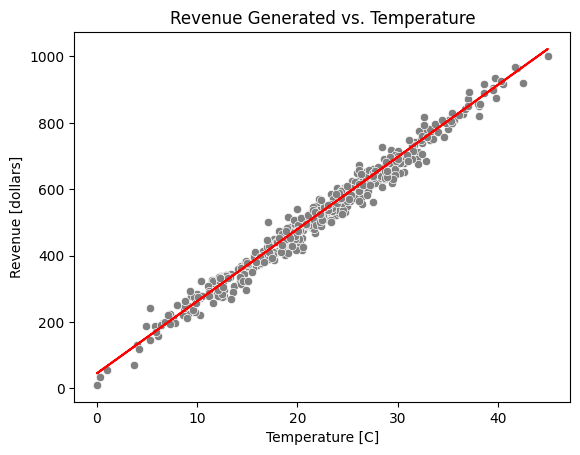

In [38]:
sns.scatterplot(data=sales_df, x='Temperature', y='Revenue', color='gray')
plt.plot(X_train, model.predict(X_train), color="red")
plt.xlabel("Temperature [C]")
plt.ylabel('Revenue [dollars]')
plt.title("Revenue Generated vs. Temperature")
plt.show()

## 7. Confirm results using sklearn

In [ ]:
X_train = X_train.values
y_train = y_train.values

In [41]:
X_train = X_train.reshape(-1,1)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
regressor.coef_

array([21.44362551])

In [44]:
regressor.intercept_

44.83126709056353

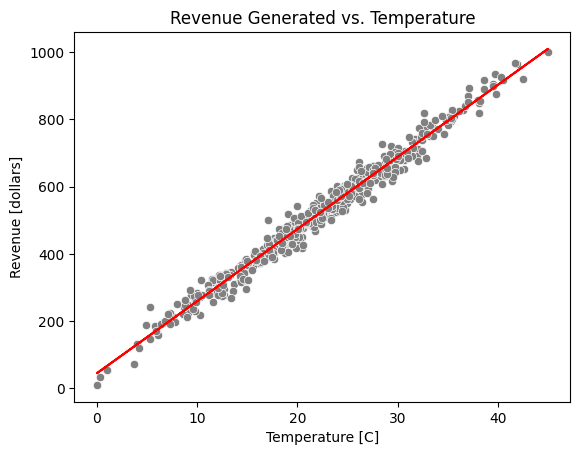

In [45]:
sns.scatterplot(data=sales_df, x='Temperature', y='Revenue', color='gray')
plt.plot(X_train, regressor.predict(X_train), color="red")
plt.xlabel("Temperature [C]")
plt.ylabel('Revenue [dollars]')
plt.title("Revenue Generated vs. Temperature")
plt.show()

In [47]:
# Predictions with trained model
temp = np.array([5])
revenue = regressor.predict([temp])
print(f'Revenue Predictions Using Trained ANN = {revenue}')

Revenue Predictions Using Trained ANN = [152.04939464]
